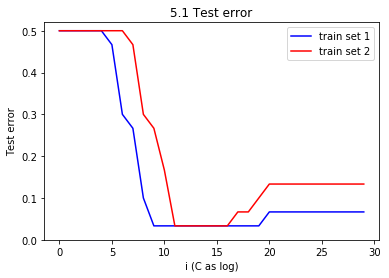

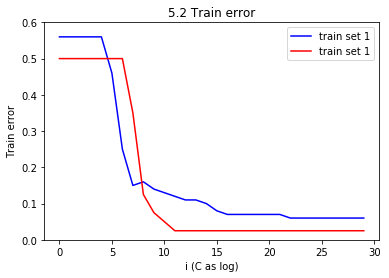

In [6]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#http://stackoverflow.com/questions/3518778/how-to-read-csv-into-record-array-in-numpy
csvtrn1 = np.array(list(csv.reader(open('wine-training1.csv'))))
csvtrn1 = csvtrn1.astype(np.float)

csvtrn2 = np.array(list(csv.reader(open('wine-training2.csv'))))
csvtrn2 = csvtrn2.astype(np.float)

csvtst = np.array(list(csv.reader(open('wine-tasting.csv'))))
csvtst = csvtst.astype(np.float)

test_error_1 = []
test_error_2 = []
train_error_1 = []
train_error_2 = []

X_trn1=[]
y_trn1=[]
for row in csvtrn1:
    X_trn1.append(row[1:])
    y_trn1.append(row[0])
    
X_trn2=[]
y_trn2=[]    
for row in csvtrn2:
    X_trn2.append(row[1:])
    y_trn2.append(row[0])

#test
X_tst=[]
y_tst=[]
for row in csvtst:
    X_tst.append(row[1:])
    y_tst.append(row[0])
    
for i in range(0,30):
    train = LogisticRegression(C = 0.0000001 * (2**i), solver='sag', max_iter=5000)
    
    train1 = train.fit(X_trn1,y_trn1) 
    test_error_1.append(1 - train1.score(X_tst,y_tst))
    train_error_1.append(1 - train1.score(X_trn1, y_trn1))
    
    train2 = train.fit(X_trn2,y_trn2)
    test_error_2.append(1 - train2.score(X_tst,y_tst))
    train_error_2.append(1 - train1.score(X_trn2, y_trn2))

# Plotting decision regions
plt.figure(1)
plt.plot(range(0, 30), test_error_1, c='blue', label='train set 1')
plt.plot(range(0, 30), test_error_2, c='red', label='train set 2')
plt.legend(loc=1)
plt.ylim(0, 0.52)
plt.ylabel('Test error')
plt.xlabel('i (C as log)')
plt.title('5.1 Test error')
plt.show()

####################question 2###########

plt.figure(2)
plt.plot(range(0, 30), train_error_1, c='blue', label='train set 1')
plt.plot(range(0, 30), train_error_2, c='red', label='train set 1')
plt.legend(loc=1)
plt.ylim(0, 0.6)
plt.ylabel('Train error')
plt.xlabel('i (C as log)')
plt.title('5.2 Train error')
plt.show()